[View in Colaboratory](https://colab.research.google.com/github/robmarkcole/robins-google-colaboratory/blob/master/Hass_data_detective.ipynb)

In [1]:
!pip install HASS-data-detective

    100% |████████████████████████████████| 5.6MB 5.7MB/s 
  Running setup.py bdist_wheel for HASS-data-detective ... - done
  Stored in directory: /content/.cache/pip/wheels/d8/bd/89/6e155dd59f79ccd003f8f6756e75148b71abd48bd1bb2d6b4d
  Running setup.py bdist_wheel for sqlalchemy ... - \ | / - \ | / done
  Stored in directory: /content/.cache/pip/wheels/df/fc/61/df2f43ec3f11f864554bdc006a866a3ffffa59740bcf3674ef
Successfully built HASS-data-detective sqlalchemy
tensorflow 1.2.0 has requirement markdown==2.2.0, but you'll have markdown 2.6.11 which is incompatible.


In [0]:
import os
import sys
import detective.core as detective
import detective.helpers as helpers
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None  # Suppress chained_assignment warning, default='warn'
import seaborn as sns
from sqlalchemy import text
import matplotlib.pyplot as plt
%matplotlib inline


https://github.com/robmarkcole/HASS-data-detective/blob/master/usage/Usage%20of%20detective.ipynb

Lets upload my HA .db file

In [5]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving home-assistant_v2.db to home-assistant_v2.db
User uploaded file "home-assistant_v2.db" with length 11096064 bytes


In [6]:
ls

datalab/  home-assistant_v2.db


In [11]:
os.getcwd()

'/content'

In [16]:
db_file = '/home-assistant_v2.db'
DB_URL = 'sqlite:////' + os.getcwd() + db_file
DB_URL

'sqlite://///content/home-assistant_v2.db'

In [17]:
%%time
 db = detective.HassDatabase(DB_URL)

Successfully connected to database
There are 40 entities with data
CPU times: user 5 ms, sys: 2 ms, total: 7 ms
Wall time: 11.2 ms


In [18]:
db.domains

['persistent_notification',
 'light',
 'sun',
 'group',
 'automation',
 'sensor',
 'history_graph',
 'camera']

Simple query

In [23]:
db.fetch_all_data()

Querying the database, this could take a while
master_df created successfully.


In [0]:
sensors_num_df = detective.NumericalSensors(db.master_df)

In [31]:
sensors_num_df.entities

['sensor.yweather_visibility',
 'sensor.yweather_wind_speed',
 'sensor.yweather_humidity',
 'sensor.yweather_temperature_min',
 'sensor.yweather_temperature_max',
 'sensor.yweather_temperature',
 'sensor.yweather_pressure',
 'sensor.database_sensor',
 'sensor.filesize_sensor',
 'sensor.homeassistant_v2db',
 'sensor.homeassistantlog',
 'sensor.phueconf',
 'sensor.homeassistant_v2dbwal']

In [27]:
sensors_num_df.data.head()

entity,sensor.database_sensor,sensor.filesize_sensor,sensor.homeassistant_v2db,sensor.homeassistant_v2dbwal,sensor.homeassistantlog,sensor.phueconf,sensor.yweather_humidity,sensor.yweather_pressure,sensor.yweather_temperature,sensor.yweather_temperature_max,sensor.yweather_temperature_min,sensor.yweather_visibility,sensor.yweather_wind_speed
last_changed,,,,,,,,,,,,,
2018-01-23 21:21:48.448609,7.88,8.42,10.32,4.16,0.0,0.0,83.0,1009.0,12.0,13.0,8.0,16.09,17.99
2018-01-23 21:21:48.452004,7.88,8.42,10.32,4.16,0.0,0.0,83.0,1009.0,12.0,13.0,8.0,16.09,17.99
2018-01-23 21:21:48.453546,7.88,8.42,10.32,4.16,0.0,0.0,83.0,1009.0,12.0,13.0,8.0,16.09,17.99
2018-01-23 21:21:49.541845,7.88,8.42,10.32,4.16,0.0,0.0,83.0,1009.0,12.0,13.0,8.0,16.09,17.99
2018-01-23 21:21:49.543196,7.88,8.42,10.32,4.16,0.0,0.0,83.0,1009.0,12.0,13.0,8.0,16.09,17.99


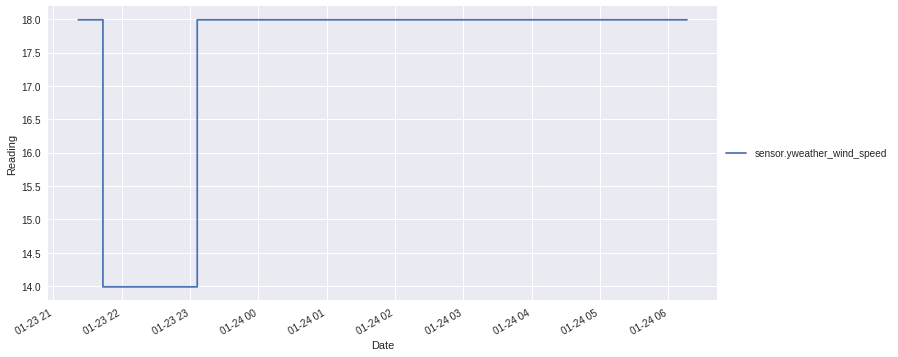

In [32]:
sensors_num_df.plot('sensor.yweather_wind_speed')